## Imports

In [1]:
import folium
import geopandas as gpd

from pystac_client import Client

## Open Static STAC Catalog
STAC items (satellite image metadata, geometry, etc.) 

In [2]:
catalog = Client.open("../../data/raw/catalog.json")
catalog.title

/home/surajkarki/Documents/My_Workspace/Coding_Works/Waterbody_Mapping_from_Satellite_Imagery/.venv/lib/python3.12/site-packages/pystac_client/client.py:186: NoConformsTo: Server does not advertise any conformance classes.
  warnings.warn(NoConformsTo())


's1s2_water'

**Getting all items and converting them to geopandas dataframe**

In [3]:

items = [item.to_dict() for item in catalog.get_all_items()]
gdf = gpd.GeoDataFrame.from_features(features=items, crs=3857).to_crs(4326) # assumes the original coordinate system is Web Mercator (EPSG:3857). converts the coordinate reference system to WGS 84 (EPSG:4326), which uses lat/lon coordinates (common for most geospatial work).
gdf.head()

/home/surajkarki/Documents/My_Workspace/Coding_Works/Waterbody_Mapping_from_Satellite_Imagery/.venv/lib/python3.12/site-packages/pystac_client/client.py:463: FallbackToPystac: Falling back to pystac. This might be slow.
  self._warn_about_fallback("ITEM_SEARCH")


,geometry,flood,split,datetime,landcover,s1_srcids,s2_srcids,copdem30_slope,copdem30_elevation,date_s1,date_s2
0,"POLYGON ((166.27203 -45.14621, 167.6676 -45.12...",False,val,2020-01-01T00:00:00Z,"Tree cover, broadleaved, evergreen, closed to ...",[S1B_IW_GRDH_1SDV_20200206T075413_20200206T075...,[S2B_MSIL1C_20200209T224759_N0209_R115_T58GFQ_...,sentinel12_copdem30_93_slope,sentinel12_copdem30_93_elevation,20200206,20200209
1,"POLYGON ((106.16716 39.7444, 107.44788 39.7244...",False,train,2020-01-01T00:00:00Z,Grassland,[S1A_IW_GRDH_1SDV_20201108T104645_20201108T104...,[S2A_MSIL1C_20201107T033941_N0209_R061_T48SXJ_...,sentinel12_copdem30_91_slope,sentinel12_copdem30_91_elevation,20201108,20201107
2,"POLYGON ((-14.09034 8.95716, -14.09034 9.94593...",False,train,2020-01-01T00:00:00Z,Water bodies,[S1A_IW_GRDH_1SDV_20190422T190812_20190422T190...,[S2A_MSIL1C_20190422T110621_N0207_R137_T28PFR_...,sentinel12_copdem30_9_slope,sentinel12_copdem30_9_elevation,20190422,20190422
3,"POLYGON ((50.9998 25.31673, 52.09064 25.3127, ...",False,test,2020-01-01T00:00:00Z,Water bodies,[S1A_IW_GRDH_1SDV_20200410T023157_20200410T023...,[S2A_MSIL1C_20200414T070621_N0209_R106_T39RWH_...,sentinel12_copdem30_89_slope,sentinel12_copdem30_89_elevation,20200410,20200414
4,"POLYGON ((32.02016 23.50747, 33.0956 23.51053,...",False,test,2020-01-01T00:00:00Z,Bare areas,[S1B_IW_GRDH_1SDV_20201124T155420_20201124T155...,[S2B_MSIL1C_20201126T082259_N0209_R121_T36QVL_...,sentinel12_copdem30_88_slope,sentinel12_copdem30_88_elevation,20201124,20201126


**EDA**

In [8]:
# General info
print(gdf.info())

# Preview data
print(gdf.head())

# Summary statistics for numeric columns
print(gdf.describe(include='all'))

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   geometry            65 non-null     geometry
 1   flood               65 non-null     bool    
 2   split               65 non-null     object  
 3   datetime            65 non-null     object  
 4   landcover           65 non-null     object  
 5   s1_srcids           65 non-null     object  
 6   s2_srcids           65 non-null     object  
 7   copdem30_slope      65 non-null     object  
 8   copdem30_elevation  65 non-null     object  
 9   date_s1             65 non-null     object  
 10  date_s2             65 non-null     object  
dtypes: bool(1), geometry(1), object(9)
memory usage: 5.3+ KB
None
                                            geometry  flood  split  \
0  POLYGON ((166.27203 -45.14621, 167.6676 -45.12...  False    val   
1  POLYGON ((106.16716 39.7444, 

landcover
Tree cover, needleleaved, evergreen, closed to open (>15%)                        11
Water bodies                                                                       9
Herbaceous cover                                                                   7
Tree cover, broadleaved, deciduous, closed to open (>15%)                          6
Shrubland                                                                          5
Grassland                                                                          5
Cropland rainfed                                                                   4
Tree cover, broadleaved, evergreen, closed to open (>15%)                          3
Tree cover, needleleaved, deciduous, closed to open (>15%)                         2
Shrub or herbaceous cover, flooded, fresh saline brakish water                     2
Cropland irrigated or post-flooding                                                2
Tree cover, needleleaved, evergreen, closed (>40%)     

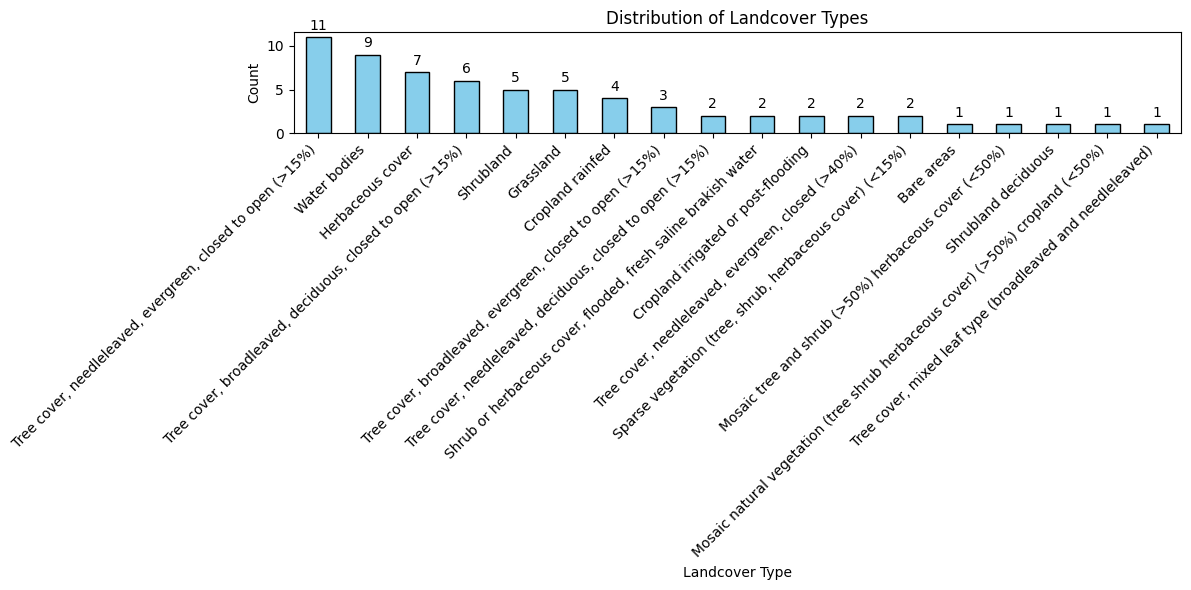

In [13]:
import matplotlib.pyplot as plt

# Get and print landcover counts
landcover_counts = gdf['landcover'].value_counts()
print(landcover_counts)

plt.figure(figsize=(12, 6))
ax = landcover_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Distribution of Landcover Types")
plt.xlabel("Landcover Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')

# Add count labels on top of each bar
for i, count in enumerate(landcover_counts.values):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [15]:
# Step 1: Filter for Water body landcover
water_gdf = gdf[gdf['landcover'].str.contains("Water bodies", na=False)]

# Step 2: Check Sentinel-1 and Sentinel-2 availability
has_s1 = water_gdf['s1_srcids'].apply(lambda x: isinstance(x, list) and len(x) > 0)
has_s2 = water_gdf['s2_srcids'].apply(lambda x: isinstance(x, list) and len(x) > 0)

# Step 3: Count combinations
s1_count = has_s1.sum()
s2_count = has_s2.sum()
both_count = (has_s1 & has_s2).sum()
neither_count = (~has_s1 & ~has_s2).sum()

# Step 4: Print results
print("For 'Water bodies' landcover:")
print(f"- With Sentinel-1 data: {s1_count}")
print(f"- With Sentinel-2 data: {s2_count}")
print(f"- With both S1 and S2: {both_count}")
print(f"- With neither S1 nor S2: {neither_count}")


For 'Water bodies' landcover:
- With Sentinel-1 data: 8
- With Sentinel-2 data: 9
- With both S1 and S2: 8
- With neither S1 nor S2: 0


In [6]:
# visualize samples on map (train, val, test)
m = folium.Map()

popup = folium.GeoJsonPopup(
    fields=["split", "landcover"],
    aliases=["split", "landcover"],
    sticky=True,
    labels=True,
    style="background-color: #F0EFEF; border: 1px solid black; border-radius: 3px; box-shadow: 3px;",
)


def style_function(feature):
    return {
        "fillOpacity": 0.9,
        "weight": 0,
        "fillColor": "#00ff00"
        if feature["properties"]["split"] == "train"
        else "#0000ff"
        if feature["properties"]["split"] == "val"
        else "#ff0000",
    }


folium.GeoJson(gdf.to_json(), popup=popup, style_function=style_function).add_to(m)
m.fit_bounds(m.get_bounds())
m


In [10]:
# Create map with satellite imagery background
m = folium.Map(tiles="Esri.WorldImagery", zoom_start=6)

popup = folium.GeoJsonPopup(
    fields=["split", "landcover"],
    aliases=["split", "landcover"],
    sticky=True,
    labels=True,
    style="background-color: #F0EFEF; border: 1px solid black; border-radius: 3px; box-shadow: 3px;",
)

def style_function(feature):
    return {
        "fillOpacity": 0.9,
        "weight": 0,
        "fillColor": "#00ff00"
        if feature["properties"]["split"] == "train"
        else "#0000ff"
        if feature["properties"]["split"] == "val"
        else "#ff0000",
    }

# Add your GeoJson overlay to the map
folium.GeoJson(gdf.to_json(), popup=popup, style_function=style_function).add_to(m)

# Fit map to bounds
m.fit_bounds(m.get_bounds())

# Display
m
